In [1]:
from ramCOH.signal_processing import functions as f
import ramCOH.raman as ram
from ramCOH.signal_processing import curves as c
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotStyle as ps

ps.layout(colors=ps.colors.vitaminC)

In [2]:
olivine_file = "./olivine/PI032-04-01_2022_03_01_15_42_56_532nm_Edge_100�_x50_VIS_LWD_H150_1800 (450-850nm)_5s x 2_01.txt"
x, y = np.genfromtxt(olivine_file, unpack=True)

In [3]:
olivine = ram.olivine(x, y)
olivine.baselineCorrect()
olivine.calculate_noise()
olivine.noise

10.79147579707443

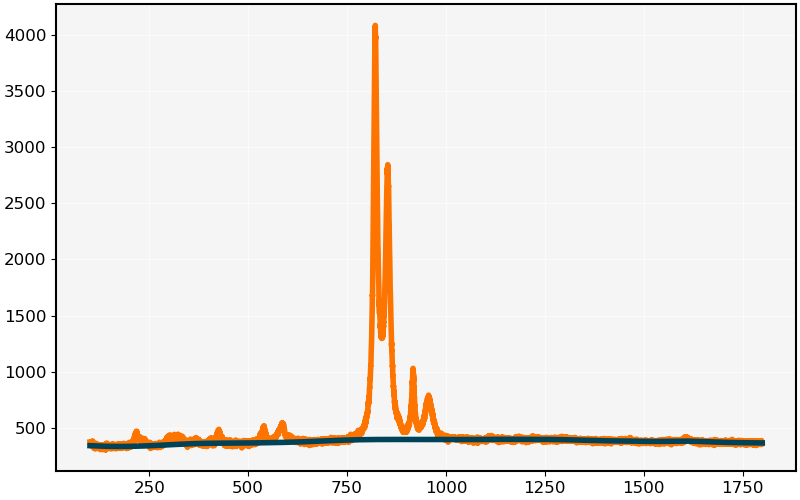

In [4]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y)
plt.plot(x, olivine.baseline)

# plt.plot(olivine.x, olivine.intensities["BC"])

plt.show()

In [5]:
olivine.deconvolve(noise_threshold=0.5, min_amplitude=1)

/Users/thomas/Desktop/ramCOH/ramCOH/signal_processing/deconvolution.py:151: UserWarning: Noise improved by <10%, using previous result
  warnings.warn("Noise improved by <10%, using previous result")


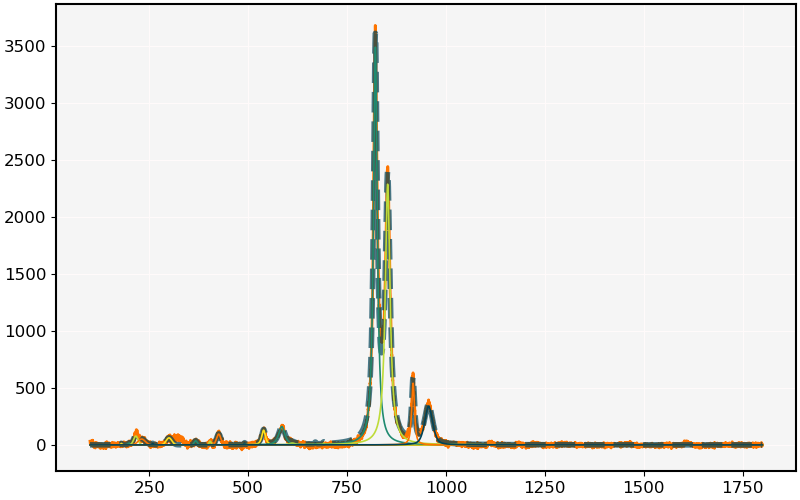

In [6]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(olivine.x, olivine.intensities["BC"], linewidth=2)
plt.plot(olivine.x, c.sum_GaussLorentz(olivine.x, *olivine.deconvolution_parameters), alpha=0.7, linestyle="dashed")
# plt.plot(x, spline)
for curve in olivine.deconvoluted_peaks:
    plt.plot(olivine.x, c.GaussLorentz(olivine.x, **curve), linewidth=1.2)
# plt.plot(xtrim, f.sum_GaussLorentz(xtrim, *params), linewidth=1)

In [7]:
olivine.deconvolution_parameters

[array([179.43515275, 198.97359302, 216.00828488, 230.66245331,
        258.63523691, 299.84336219, 367.24210222, 403.72732353,
        425.36773785, 490.89439965, 539.12643695, 585.0371914 ,
        611.58407194, 639.13707049, 669.84270985, 691.40723513,
        821.67732503, 852.69176255, 916.97004659, 956.35109521]),
 array([  12.99867691,   16.9768158 ,   77.56937158,   51.50322603,
          12.99867691,   61.7526536 ,   36.34693851,   32.61548166,
          94.89351747,   15.38619596,  129.33341132,  161.25126057,
          16.13237608,   15.38619596,   15.38619596,   15.38619596,
        3492.09627193, 2288.75539849,  541.83862263,  340.20246437]),
 array([ 1.8961875 ,  3.19005139,  5.60293687,  9.18720064,  1.8961875 ,
         7.17367494,  3.77327864,  2.49610787,  5.42285993,  1.81181333,
         5.31058656,  8.80430535,  7.84073696,  1.81181333,  1.81181333,
         1.81181333,  5.6230943 ,  7.28397831,  4.08786626, 10.70340664]),
 array([1.00000000e+00, 1.00000000e+00, 9.

0.012